# WRAPUP 섹터별 주가추이 분석하기 (금융)

## 데이터 수집, EDA분석

In [101]:
# FinancialDataReader 설치
!pip install --upgrade finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.6 MB/s eta 0:00:00


In [102]:
!pip install --upgrade yfinance

In [95]:
# 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import FinanceDataReader as fdr
import warnings
import os
# $matplotlib inline
warnings.filterwarnings('ignore')

# plt.rcParams['font.family'] = 'NunumGothic'
# plt.rcParams['axes.unicode_minus'] = False

In [96]:
# # FinancialDataReader이용해서 데이터 가져오기
# df_krx = fdr.StockListing('KRX')
# df_krx.head()

In [97]:
# # FinancialDataReader이용해서 데이터 가져오기
# df_kospi = fdr.StockListing('KOSPI')
# df_kospi.head()

### finance Reader (x)

In [98]:
# # import FinanceDataReader as fdr
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')

# def plot_pie(market, col = 'Sector'):
#   stock_df = fdr.StockListing(market)
#   df = stock_df.groupby(by = col).size().reset_index(name = 'Count')
#   df.loc[df.Count < (df.Count.sum() / 100), col] = 'Etc'
#   df = df.groupby(by = col).sum().sort_values(by = 'Count', ascending = False)

#   explode = [0.1] * (len(df) // 3) + [0] * (len(df) - len(df) // 3)
#   if len(df) > 20:
#     explode = [0] + [0.1] * 5
#     explode += [0] * (len(df) - len(explode))

#   wedgeprops = {'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}

#   df.plot.pie(y = 'Count', autopct = '%1.1f%%',
#               explode = explode, wedgeprops = wedgeprops, pctdistance = 0.8,
#               figsize = (10, 10), ylabel = '', legend = False)
#   plt.title(f'{col} of {market}')
#   plt.show()

# plot_pie('KRX', 'Market')


### yfinance 이용한 방법.
  국내 데이터 외에 해외데이터등도 이용가능

In [ ]:
import yfinance as yf
import pandas as pd

target_stocks = {
    '105560': 'KB금융',
    '055550': '신한지주',
    '086790': '하나금융지주',
    '316140': '우리금융지주',
    '035720': '카카오뱅크'
    ''
}

def get_sector_from_yfinance(stock_code: str) -> (str, str):
    """
    yfinance 라이브러리를 사용해 종목의 업종과 산업 정보를 가져오는 함수

    :param stock_code: 6자리 종목 코드 (예: '105560')
    :return: (업종, 산업) 튜플. 실패 시 (None, None) 반환
    """
    # 코스피(.KS)와 코스닥(.KQ) 접미사를 순서대로 시도
    for suffix in ['.KS', '.KQ']:
        try:
            # yfinance Ticker 객체 생성
            ticker_symbol = f"{stock_code}{suffix}"
            ticker = yf.Ticker(ticker_symbol)

            # .info 속성은 종목의 모든 상세 정보를 담고 있는 딕셔너리
            info = ticker.info

            # 'sector' 키가 있는지 확인 후 반환
            # 'sector' 키가 없는 경우도 있으므로 .get() 메소드로 안전하게 접근
            if info and 'sector' in info:
                sector = info.get('sector', '정보 없음')
                industry = info.get('industry', '정보 없음')
                return sector, industry

        except Exception:
            # 해당 Ticker가 존재하지 않는 등 오류 발생 시 다음 접미사로 넘어감
            continue

    # .KS, .KQ 모두 실패한 경우
    return None, None

# --- 함수 사용 예시 ---
# 분석할 금융주 및 비교군 종목 코드 (시총 상위 10개 종목.)

print("yfinance에서 업종 정보를 가져옵니다...")

results = []
for code, name in target_stocks.items():
    sector, industry = get_sector_from_yfinance(code)
    if sector:
        results.append({'종목코드': code, '종목명': name, '업종': sector, '세부산업': industry})
        print(f"- {name}({code}): [업종] {sector}, [세부산업] {industry}")
    else:
        print(f"- {name}({code}): 업종 정보를 가져오는데 실패했습니다.")

# 결과를 pandas DataFrame으로 보기 좋게 정리
df_sectors = pd.DataFrame(results)
print("\n--- 결과 요약 (DataFrame) ---")
print(df_sectors)

# 은행 업종만 필터링하기
# yfinance는 업종을 'Financial Services' 등으로 분류합니다.
if not df_sectors.empty:
    df_banks = df_sectors[df_sectors['업종'] == 'Financial Services']
    print("\n--- 'Financial Services' 업종만 필터링 ---")
    print(df_banks)

yfinance에서 업종 정보를 가져옵니다...
- KB금융(105560): [업종] Financial Services, [세부산업] Banks - Regional
- 신한지주(055550): [업종] Financial Services, [세부산업] Banks - Regional
- 하나금융지주(086790): [업종] Financial Services, [세부산업] Banks - Regional
- 우리금융지주(316140): [업종] Financial Services, [세부산업] Banks - Regional
- 카카오뱅크(035720): [업종] Communication Services, [세부산업] Internet Content & Information

--- 결과 요약 (DataFrame) ---
     종목코드     종목명                      업종                            세부산업
0  105560    KB금융      Financial Services                Banks - Regional
1  055550    신한지주      Financial Services                Banks - Regional
2  086790  하나금융지주      Financial Services                Banks - Regional
3  316140  우리금융지주      Financial Services                Banks - Regional
4  035720   카카오뱅크  Communication Services  Internet Content & Information

--- 'Financial Services' 업종만 필터링 ---
     종목코드     종목명                  업종              세부산업
0  105560    KB금융  Financial Services  Banks - Regional
1  0

In [ ]:
# :### 수집된 데이터를 시가총액으로 각 년도나 분기별 파이차트 그리기 ()
# tech = yf.Sector(msft.info.get('sectorKey'))
# software = yf.Industry(msft.info.get('industryKey'))

AttributeError: type object 'Sector' has no attribute 'sector_list'

In [124]:
kb = yf.Ticker('105560.KS')
kb_keylist = list(kb.info.keys())
len(kb_keylist)

149

In [142]:
meritz = yf.Ticker('008560')
meritz_keylist = list(meritz.info.keys())
len(meritz_keylist)

ERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 008560"}}}


1

In [141]:
meritz.info

{'quoteType': 'NONE',
 'symbol': '008560.KS',
 'language': 'en-US',
 'region': 'US',
 'triggerable': False,
 'customPriceAlertConfidence': 'NONE',
 'tradeable': False,
 'cryptoTradeable': False,
 'esgPopulated': False,
 'hasPrePostMarketData': False,
 'corporateActions': [],
 'trailingPegRatio': None}

In [139]:
kb.info['city']

KeyError: ('city', 'zip')

In [ ]:
keys_to_delete = ['address1', 'address2', ]

In [130]:
kb_keylist

['address1',
 'address2',
 'city',
 'zip',
 'country',
 'phone',
 'website',
 'industry',
 'industryKey',
 'industryDisp',
 'sector',
 'sectorKey',
 'sectorDisp',
 'longBusinessSummary',
 'companyOfficers',
 'auditRisk',
 'boardRisk',
 'compensationRisk',
 'shareHolderRightsRisk',
 'overallRisk',
 'governanceEpochDate',
 'executiveTeam',
 'maxAge',
 'priceHint',
 'previousClose',
 'open',
 'dayLow',
 'dayHigh',
 'regularMarketPreviousClose',
 'regularMarketOpen',
 'regularMarketDayLow',
 'regularMarketDayHigh',
 'dividendRate',
 'dividendYield',
 'exDividendDate',
 'payoutRatio',
 'fiveYearAvgDividendYield',
 'beta',
 'volume',
 'regularMarketVolume',
 'averageVolume',
 'averageVolume10days',
 'averageDailyVolume10Day',
 'bid',
 'ask',
 'bidSize',
 'askSize',
 'marketCap',
 'fiftyTwoWeekLow',
 'fiftyTwoWeekHigh',
 'allTimeHigh',
 'allTimeLow',
 'priceToSalesTrailing12Months',
 'fiftyDayAverage',
 'twoHundredDayAverage',
 'currency',
 'tradeable',
 'enterpriseValue',
 'forwardPE',
 'pro

In [112]:
import FinanceDataReader as fdr
import yfinance as yf
import pandas as pd
from tqdm import tqdm

def get_korean_stock_list():
    """KOSPI + KOSDAQ 상장 종목 전체 리스트 반환"""
    kospi = fdr.StockListing('KOSPI')
    kosdaq = fdr.StockListing('KOSDAQ')
    df = pd.concat([kospi, kosdaq], ignore_index=True)
    return df

def convert_to_yf_symbol(code, market):
    """KRX 종목 코드를 yfinance 형식으로 변환"""
    code = str(code).zfill(6)
    if market == 'KOSPI':
        return code + ".KS"
    else:
        return code + ".KQ"

def fetch_info_for_korean_market(top_n=None):
    # 1) 한국 전체 종목 리스트 가져오기
    df_list = get_korean_stock_list()

    # KOSPI/KOSDAQ 라벨을 yfinance 심볼로 변환
    df_list["yfsymbol"] = df_list.apply(
        lambda row: convert_to_yf_symbol(row["Code"], row["Market"]), axis=1
    )

    symbols = df_list["yfsymbol"].tolist()

    # 2) yfinance info 수집
    rows = []
    for sym in tqdm(symbols, desc="Fetching yfinance info"):
        try:
            tkr = yf.Ticker(sym)
            info = tkr.info

            row = {
              "symbol": sym,
                "shortName": info.get("shortName"),
                "longName": info.get("longName"),
                "sector": info.get("sector"),
                "industry": info.get("industry"),
                "exchange": info.get("exchange"),

                # 밸류에이션 / 시총
                "marketCap": info.get("marketCap"),
                "trailingPE": info.get("trailingPE"),
                "forwardPE": info.get("forwardPE"),
                "priceToBook": info.get("priceToBook"),
                "enterpriseValue": info.get("enterpriseValue"),
                "enterpriseToEbitda": info.get("enterpriseToEbitda"),

                # 가격 / 배당
                "currentPrice": info.get("currentPrice") or info.get("regularMarketPrice"),
                "previousClose": info.get("previousClose"),
                "fiftyTwoWeekHigh": info.get("fiftyTwoWeekHigh"),
                "fiftyTwoWeekLow": info.get("fiftyTwoWeekLow"),
                "trailingAnnualDividendRate": info.get("trailingAnnualDividendRate"),
                "trailingAnnualDividendYield": info.get("trailingAnnualDividendYield"),
                "dividendYield": info.get("dividendYield"),

                # 사이즈 / 유동성
                "sharesOutstanding": info.get("sharesOutstanding"),
                "floatShares": info.get("floatShares"),
                "averageDailyVolume10Day": info.get("averageDailyVolume10Day"),
                "averageVolume": info.get("averageVolume"),

                # 수익성
                "returnOnEquity": info.get("returnOnEquity"),
                "returnOnAssets": info.get("returnOnAssets"),
                "profitMargins": info.get("profitMargins"),
            }
            rows.append(row)

        except Exception:
            continue

    df_info = pd.DataFrame(rows)

    # 3) 시장 전체 시가총액 정렬
    df_info = df_info.dropna(subset=["marketCap"])
    df_info = df_info.sort_values("marketCap", ascending=False).reset_index(drop=True)

    # 필요 시 top 100, top 200 등만 반환
    if top_n:
        return df_info.head(top_n)

    return df_info

# 실행 예시
df_korea_info = fetch_info_for_korean_market()

print(df_korea_info.head())
print("총 수집된 한국 종목 수:", len(df_korea_info))



Fetching yfinance info: 100%|██████████| 2763/2763 [03:48<00:00, 12.09it/s]

      symbol           shortName                       longName  \
0  005935.KS     SamsungElec(1P)  Samsung Electronics Co., Ltd.   
1  005930.KS         SamsungElec  Samsung Electronics Co., Ltd.   
2  000660.KS            SK hynix                  SK hynix Inc.   
3  373220.KS  LG Energy Solution       LG Energy Solution, Ltd.   
4  005389.KS     HyundaiMtr(3PB)          Hyundai Motor Company   

              sector                      industry exchange     marketCap  \
0         Technology          Consumer Electronics      KSC  6.933604e+14   
1         Technology          Consumer Electronics      KSC  6.916870e+14   
2         Technology                Semiconductors      KSC  4.572402e+14   
3        Industrials  Electrical Equipment & Parts      KSC  1.133730e+14   
4  Consumer Cyclical            Auto Manufacturers      KSC  6.863924e+13   

  trailingPE  forwardPE priceToBook  ...  trailingAnnualDividendRate  \
0       None   8.717252        None  ...                      

In [113]:
df_korea_info.head(5)

,symbol,shortName,longName,sector,industry,exchange,marketCap,trailingPE,forwardPE,priceToBook,...,trailingAnnualDividendRate,trailingAnnualDividendYield,dividendYield,sharesOutstanding,floatShares,averageDailyVolume10Day,averageVolume,returnOnEquity,returnOnAssets,profitMargins
0,005935.KS,SamsungElec(1P),"Samsung Electronics Co., Ltd.",Technology,Consumer Electronics,KSC,6.933604e+14,None,8.717252,None,...,None,None,1.98,8.093377e+08,5.494895e+09,3808082,2769599.0,0.08316,0.03706,0.10292
1,005930.KS,SamsungElec,"Samsung Electronics Co., Ltd.",Technology,Consumer Electronics,KSC,6.916870e+14,None,10.142545,None,...,None,None,1.52,5.876745e+09,5.494895e+09,27061058,21571557.0,0.08316,0.03706,0.10292
2,000660.KS,SK hynix,SK hynix Inc.,Technology,Semiconductors,KSC,4.572402e+14,None,7.821799,None,...,None,None,0.27,6.904121e+08,NaN,5373143,3994439.0,NaN,NaN,0.00000
3,373220.KS,LG Energy Solution,"LG Energy Solution, Ltd.",Industrials,Electrical Equipment & Parts,KSC,1.133730e+14,None,86.743164,None,...,None,None,NaN,2.340000e+08,4.715802e+07,385963,342448.0,0.01519,0.01043,-0.04270
4,005389.KS,HyundaiMtr(3PB),Hyundai Motor Company,Consumer Cyclical,Auto Manufacturers,KSC,6.863924e+13,None,NaN,None,...,None,None,5.02,2.326726e+06,NaN,20046,17718.0,NaN,NaN,0.00000


In [114]:
df_korea_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   symbol                       908 non-null    object 
 1   shortName                    908 non-null    object 
 2   longName                     895 non-null    object 
 3   sector                       894 non-null    object 
 4   industry                     894 non-null    object 
 5   exchange                     908 non-null    object 
 6   marketCap                    908 non-null    float64
 7   trailingPE                   0 non-null      object 
 8   forwardPE                    327 non-null    float64
 9   priceToBook                  0 non-null      object 
 10  enterpriseValue              858 non-null    float64
 11  enterpriseToEbitda           803 non-null    float64
 12  currentPrice                 908 non-null    float64
 13  previousClose       

In [115]:
df_korea = df_korea_info.copy()

In [116]:
df_korea.drop(['priceToBook', 'trailingPE', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield'], axis=1, inplace=True)

In [117]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symbol                   908 non-null    object 
 1   shortName                908 non-null    object 
 2   longName                 895 non-null    object 
 3   sector                   894 non-null    object 
 4   industry                 894 non-null    object 
 5   exchange                 908 non-null    object 
 6   marketCap                908 non-null    float64
 7   forwardPE                327 non-null    float64
 8   enterpriseValue          858 non-null    float64
 9   enterpriseToEbitda       803 non-null    float64
 10  currentPrice             908 non-null    float64
 11  previousClose            896 non-null    float64
 12  fiftyTwoWeekHigh         908 non-null    float64
 13  fiftyTwoWeekLow          908 non-null    float64
 14  dividendYield            6

In [144]:
df_korea[df_korea['symbol'] == '138040.KS']

,symbol,shortName,longName,sector,industry,exchange,marketCap,forwardPE,enterpriseValue,enterpriseToEbitda,...,fiftyTwoWeekHigh,fiftyTwoWeekLow,dividendYield,sharesOutstanding,floatShares,averageDailyVolume10Day,averageVolume,returnOnEquity,returnOnAssets,profitMargins
44,138040.KS,Meritz Financial,Meritz Financial Group Inc.,Financial Services,Capital Markets,KSC,1.942260e+13,7.176717,9.962744e+12,NaN,...,131000.0,96700.0,1.11,175136176.0,76720153.0,314946,246931.0,0.21959,0.02064,0.14158


### GPT응답. market_weight 대장주 선별 기준


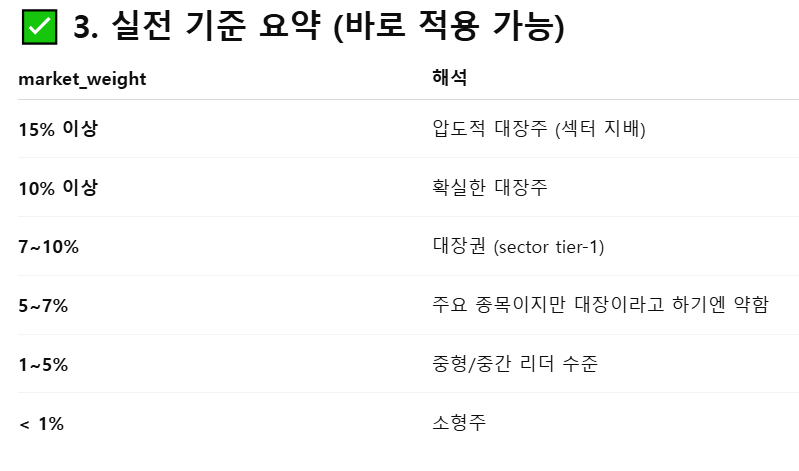

### yfinance 각 티커별 기본정보 리스트
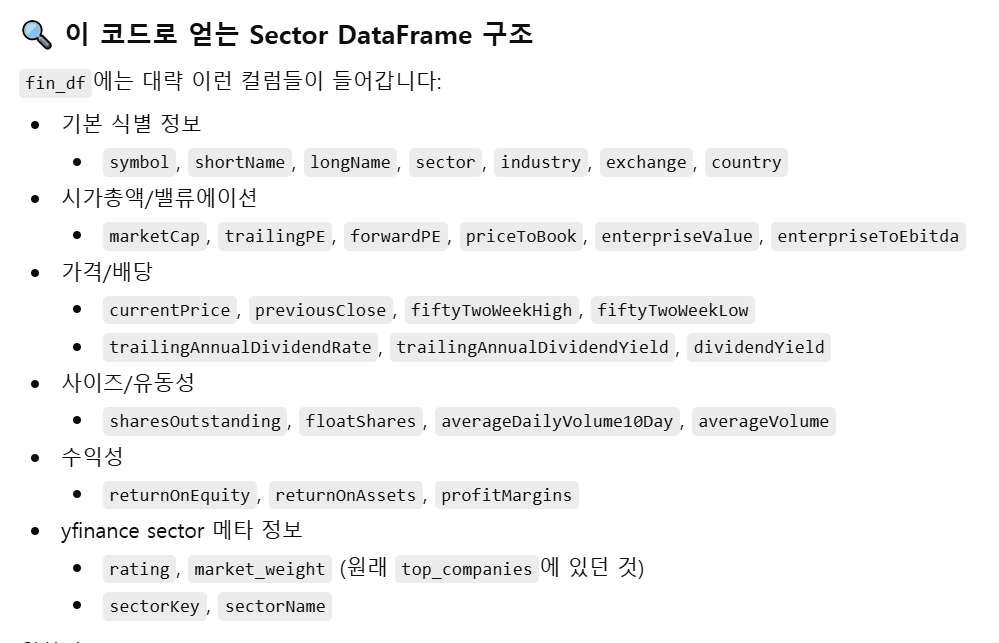

In [ ]:
# import yfinance as yf
# import pandas as pd
# from tqdm import tqdm

# def build_sector_dataframe(sector_key: str = "financial-services") -> pd.DataFrame:
#     """
#     yfinance.Sector(sector_key)에서 가져온 종목들을 기준으로
#     각 티커의 기본정보(info)를 붙여 Sector 전체 DataFrame을 만든다.
#     """
#     sector = yf.Sector(sector_key)

#     # 1) 섹터 내 종목 리스트 (top_companies에서 symbol만 사용)
#     top_list = sector.top_companies               # list of dict (rating, market_weight, symbol, ...)
#     top_df   = pd.DataFrame(top_list)

#     if "symbol" not in top_df.columns:
#         raise ValueError("top_companies 안에 'symbol' 컬럼이 없습니다. yfinance 버전을 확인해 주세요.")

#     symbols = top_df["symbol"].dropna().unique().tolist()

#     # 2) 각 심볼별로 yfinance.Ticker.info에서 기본정보 수집
#     rows = []
#     for sym in tqdm(symbols, desc=f"Fetching info for sector={sector_key}"):
#         try:
#             tkr  = yf.Ticker(sym)
#             info = tkr.info  # dict

#             # 관심 있는 기본지표들만 뽑아서 정리
#             row = {
#                 "symbol": sym,
#                 "shortName": info.get("shortName"),
#                 "longName": info.get("longName"),
#                 "sector": info.get("sector"),
#                 "industry": info.get("industry"),
#                 "exchange": info.get("exchange"),
#                 "country": info.get("country"),

#                 # 밸류에이션 / 시총
#                 "marketCap": info.get("marketCap"),
#                 "trailingPE": info.get("trailingPE"),
#                 "forwardPE": info.get("forwardPE"),
#                 "priceToBook": info.get("priceToBook"),
#                 "enterpriseValue": info.get("enterpriseValue"),
#                 "enterpriseToEbitda": info.get("enterpriseToEbitda"),

#                 # 가격 / 배당
#                 "currentPrice": info.get("currentPrice") or info.get("regularMarketPrice"),
#                 "previousClose": info.get("previousClose"),
#                 "fiftyTwoWeekHigh": info.get("fiftyTwoWeekHigh"),
#                 "fiftyTwoWeekLow": info.get("fiftyTwoWeekLow"),
#                 "trailingAnnualDividendRate": info.get("trailingAnnualDividendRate"),
#                 "trailingAnnualDividendYield": info.get("trailingAnnualDividendYield"),
#                 "dividendYield": info.get("dividendYield"),

#                 # 사이즈 / 유동성
#                 "sharesOutstanding": info.get("sharesOutstanding"),
#                 "floatShares": info.get("floatShares"),
#                 "averageDailyVolume10Day": info.get("averageDailyVolume10Day"),
#                 "averageVolume": info.get("averageVolume"),

#                 # 수익성
#                 "returnOnEquity": info.get("returnOnEquity"),
#                 "returnOnAssets": info.get("returnOnAssets"),
#                 "profitMargins": info.get("profitMargins"),
#             }

#             rows.append(row)

#         except Exception as e:
#             # 일부 티커는 info 호출 실패 가능 → 스킵
#             print(f"[WARN] {sym} info fetch failed: {e}")
#             continue

#     info_df = pd.DataFrame(rows)

#     # 3) top_companies의 rating, market_weight 등을 info_df와 병합
#     #    (left_on/right_on 둘 다 symbol 기준)
#     merged = top_df.merge(info_df, on="symbol", how="left")

#     # 4) 섹터 정보 컬럼 추가
#     merged["sectorKey"] = sector_key
#     merged["sectorName"] = getattr(sector, "name", None)

#     return merged


# # 예시 실행
# if __name__ == "__main__":
#     # 예: 금융 섹터 전체 DataFrame
#     fin_df = build_sector_dataframe("financial-services")

#     # 컬럼/행 확인
#     print(fin_df.columns.tolist())
#     print(fin_df.head())


ValueError: top_companies 안에 'symbol' 컬럼이 없습니다. yfinance 버전을 확인해 주세요.

### 년도별 박스플롯으로 금융섹터 전체 시총 분석하기

In [ ]:

# # 섹터 객체
# finance = yf.Sector("Financial Services")

# # 산업 객체
# banks = yf.Industry("Banks - Regional")

# # 공통 정보 예시
# finance.key
# finance.name
# finance.top_companies   # 섹터 상위 기업들
# finance.industries      # 섹터 안에 있는 industry 목록

# banks.top_performing_companies
# banks.top_growth_companies


ERROR:yfinance:Failed to get sector data for 'Financial Services' reason: HTTP Error 404: 
ERROR:yfinance:Failed to get sector data for 'Financial Services' reason: HTTP Error 404: 
ERROR:yfinance:Failed to get sector data for 'Financial Services' reason: HTTP Error 404: 
ERROR:yfinance:Failed to get industry data for 'Banks - Regional' reason: HTTP Error 404: 
ERROR:yfinance:Failed to get industry data for 'Banks - Regional' reason: HTTP Error 404: 


/tmp/ipython-input-779187610.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=target_stock_list)
[*********************100%***********************]  5 of 5 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['086790', '316140', '035720', '055550', '105560']: YFPricesMissingError('possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, 035720)  0 non-null      float64
 1   (Adj Close, 055550)  0 non-null      float64
 2   (Adj Close, 086790)  0 non-null      float64
 3   (Adj Close, 105560)  0 non-null      float64
 4   (Adj Close, 316140)  0 non-null      float64
 5   (Close, 035720)      0 non-null      float64
 6   (Close, 055550)      0 non-null      float64
 7   (Close, 086790)      0 non-null      float64
 8   (Close, 105560)      0 non-null      float64
 9   (Close, 316140)      0 non-null      float64
 10  (High, 035720)       0 non-null      float64
 11  (High, 055550)       0 non-null      float64
 12  (High, 086790)       0 non-null      float64
 13  (High, 105560)       0 non-null      float64
 14  (High, 316140)       0 non-null      float64
 15  (Low, 035720)        0 non-null      float64
 16 

#### 예시코드 1 Sector

In [ ]:
# 예시1 Sectorr
import yfinance as yf

tech = yf.Sector('technology')
software = yf.Industry('software-infrastructure')

# Common information
tech.key
tech.name
tech.symbol
tech.ticker
tech.overview
tech.top_companies
tech.research_reports

# Sector information
tech.top_etfs
tech.top_mutual_funds
tech.industries

# Industry information
software.sector_key
software.sector_name
software.top_performing_companies
software.top_growth_companies


,name,ytd return,growth estimate
symbol,,,
CFLT,"Confluent, Inc.",-0.1667,5.500000
AVDX,"AvidXchange Holdings, Inc.",-0.0329,3.000000
OSPN,OneSpan Inc.,-0.3166,2.000000
IOT,Samsara Inc.,-0.1346,1.428571
GTLB,GitLab Inc.,-0.2133,1.350000


In [ ]:
tech = yf.Sector('financial-services')
software = yf.Industry('banks-regional')

# Common information
# tech.key
# tech.name
# tech.symbol
# tech.ticker
# tech.overview
# tech.top_companies
# tech.research_reports

# # Sector information
# tech.top_etfs
# tech.top_mutual_funds
# tech.industries
tech.overview

# Industry information
# software.sector_key
# software.sector_name
# software.top_performing_companies
# software.top_growth_companies
# software.overview

{'companies_count': 1485,
 'market_cap': 11113824518144,
 'message_board_id': 'INDEXYH103',
 'description': 'Companies that provide financial services include banks, savings and loans, asset management companies, credit services, investment brokerage firms, and insurance companies. Companies in this sector include Allianz, JPMorgan Chase, and Legg Mason.',
 'industries_count': 15,
 'market_weight': 0.14743376,
 'employee_count': 5622756}

#### 예시코드2 Industry

In [ ]:
import yfinance as yf
# Ticker to Sector and Industry
msft = yf.Ticker('MSFT')
tech = yf.Sector(msft.info.get('sectorKey'))
software = yf.Industry(msft.info.get('industryKey'))

# Sector and Industry to Ticker
tech_ticker = tech.ticker
tech_ticker.info
software_ticker = software.ticker
software_ticker.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-15 00:00:00-04:00,6382157.5,6382157.5,6382157.5,6382157.5,0,0.0,0.0
2025-10-16 00:00:00-04:00,6379317.0,6379317.0,6379317.0,6379317.0,0,0.0,0.0
2025-10-17 00:00:00-04:00,6332454.5,6332454.5,6332454.5,6332454.5,0,0.0,0.0
2025-10-20 00:00:00-04:00,6332442.0,6332442.0,6332442.0,6332442.0,0,0.0,0.0
2025-10-21 00:00:00-04:00,6360561.0,6360561.0,6360561.0,6360561.0,0,0.0,0.0
2025-10-22 00:00:00-04:00,6329697.0,6329697.0,6329697.0,6329697.0,0,0.0,0.0
2025-10-23 00:00:00-04:00,6384827.0,6384827.0,6384827.0,6384827.0,0,0.0,0.0
2025-10-24 00:00:00-04:00,6440978.0,6440978.0,6440978.0,6440978.0,0,0.0,0.0
2025-10-27 00:00:00-04:00,6518021.5,6518021.5,6518021.5,6518021.5,0,0.0,0.0


In [ ]:
df_sector = pd.DataFrame(yf.Sector("financial-services"))
df_sector



ValueError: DataFrame constructor not properly called!

In [ ]:
# 티커로 정보 불러오기
# kb = yf.Ticker('105560.KS')
# column = kb.info.keys()
# row = kb.info.values()
# df_kb = pd.DataFrame(kb.info)

# def get_df_from_ticker(ticker: str) -> pd.DataFrame:
#     yfinance.Ticker(ticker)


type(kb.info)
kb.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-17 00:00:00+09:00,111723.270456,115099.795964,111623.960883,113212.914062,798346,0.0,0.0
2025-10-20 00:00:00+09:00,114206.015361,117681.850611,112219.823789,117383.921875,875613,0.0,0.0
2025-10-21 00:00:00+09:00,117681.847774,119767.348873,115199.108369,115695.656250,932529,0.0,0.0
2025-10-22 00:00:00+09:00,115397.730502,115695.659239,113709.467664,115000.492188,850669,0.0,0.0
2025-10-23 00:00:00+09:00,113709.461904,115695.653378,113014.294888,114007.390625,763855,0.0,0.0
2025-10-24 00:00:00+09:00,114206.011781,115099.797960,113014.296875,113014.296875,773644,0.0,0.0
2025-10-27 00:00:00+09:00,114007.390519,117781.154317,113212.913930,117185.296875,1030435,0.0,0.0
2025-10-28 00:00:00+09:00,115298.415029,116390.820339,114206.009719,115596.343750,1203541,0.0,0.0
2025-10-29 00:00:00+09:00,117483.229647,118774.254149,113908.084873,115199.109375,1013640,0.0,0.0


# 시각화

In [145]:
df_korea.head()

,symbol,shortName,longName,sector,industry,exchange,marketCap,forwardPE,enterpriseValue,enterpriseToEbitda,...,fiftyTwoWeekHigh,fiftyTwoWeekLow,dividendYield,sharesOutstanding,floatShares,averageDailyVolume10Day,averageVolume,returnOnEquity,returnOnAssets,profitMargins
0,005935.KS,SamsungElec(1P),"Samsung Electronics Co., Ltd.",Technology,Consumer Electronics,KSC,6.933604e+14,8.717252,4.056558e+14,5.570,...,87500.0,41700.0,1.98,8.093377e+08,5.494895e+09,3808082,2769599.0,0.08316,0.03706,0.10292
1,005930.KS,SamsungElec,"Samsung Electronics Co., Ltd.",Technology,Consumer Electronics,KSC,6.916870e+14,10.142545,5.554893e+14,7.628,...,112400.0,50800.0,1.52,5.876745e+09,5.494895e+09,27061058,21571557.0,0.08316,0.03706,0.10292
2,000660.KS,SK hynix,SK hynix Inc.,Technology,Semiconductors,KSC,4.572402e+14,7.821799,3.826250e+14,7.807,...,646000.0,157600.0,0.27,6.904121e+08,NaN,5373143,3994439.0,NaN,NaN,0.00000
3,373220.KS,LG Energy Solution,"LG Energy Solution, Ltd.",Industrials,Electrical Equipment & Parts,KSC,1.133730e+14,86.743164,1.257460e+14,29.144,...,527000.0,266000.0,NaN,2.340000e+08,4.715802e+07,385963,342448.0,0.01519,0.01043,-0.04270
4,005389.KS,HyundaiMtr(3PB),Hyundai Motor Company,Consumer Cyclical,Auto Manufacturers,KSC,6.863924e+13,NaN,1.919293e+14,12.066,...,218500.0,132500.0,5.02,2.326726e+06,NaN,20046,17718.0,NaN,NaN,0.00000


In [153]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symbol                   908 non-null    object 
 1   shortName                908 non-null    object 
 2   longName                 895 non-null    object 
 3   sector                   894 non-null    object 
 4   industry                 894 non-null    object 
 5   exchange                 908 non-null    object 
 6   marketCap                908 non-null    float64
 7   forwardPE                327 non-null    float64
 8   enterpriseValue          858 non-null    float64
 9   enterpriseToEbitda       803 non-null    float64
 10  currentPrice             908 non-null    float64
 11  previousClose            896 non-null    float64
 12  fiftyTwoWeekHigh         908 non-null    float64
 13  fiftyTwoWeekLow          908 non-null    float64
 14  dividendYield            6

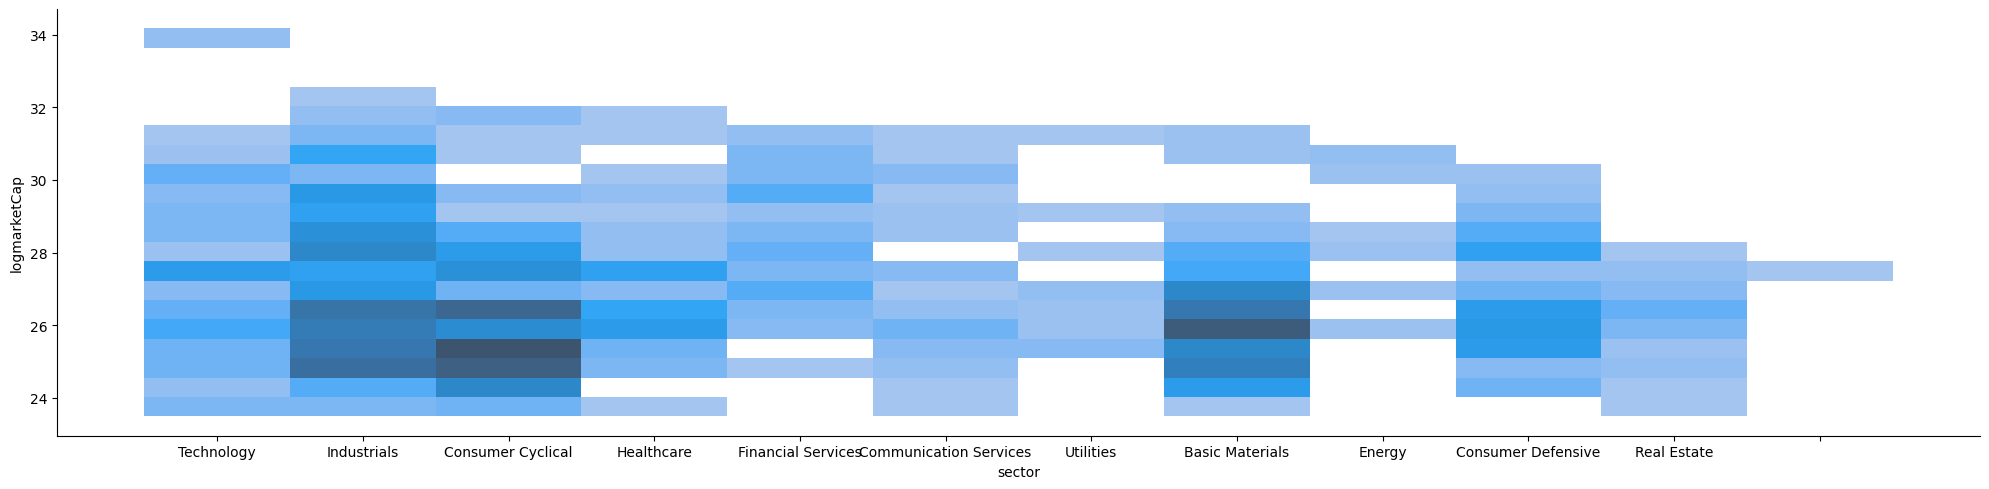

In [171]:
df_korea_copy = df_korea.copy()
df_korea_copy['logmarketCap'] = np.log1p(df_korea_copy['marketCap'])
sns.displot(x=df_korea_copy['sector'], y=df_korea_copy['logmarketCap'], aspect = 4)